# Functions

Goals for this notebook: 
 - Review linear and quadratic functions
 - Relate functions to sequences
 - Exponential functions and use exponential functions to model situations
 

## What is a function?

 - In your own words, what is a function?
 - What are some functions you know?  
 - What are some imporant things you know about functions?

## Linear Functions

Let's start with an example. 

**Sales of GPS Equipment:** The annual sales (in billions of dollars) of global positioning system (GPS) equipment from the year 2000 through 2006 is given in the following table.  Here $t=0$ corresponds to 2000. 

|Annual sales, y| 7.9|9.6|11.5|13.3|15.2|17|18.8|
|---------------|----|---|----|----|----|--|----|
|Year,t         | 0  | 1 | 2  | 3  | 4  | 5| 6  |

First plot the annual sales (y) versus the year (t)

In [1]:
#Importing many libraries we will need to do the rest of the notebook.  Make sure this has run when you are trying to work on the notebook later
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from statistics import mean
from scipy.interpolate import *
from matplotlib.pyplot import *




Text(0.5,1,'Sales v. Years')

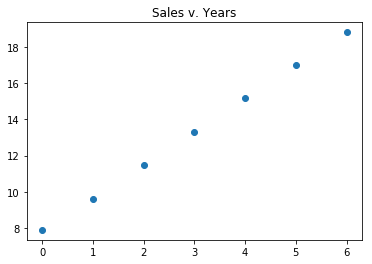

In [2]:
years=np.array([0, 1, 2, 3, 4, 5, 6]) #arrays of sales values and year values
sales=np.array([7.9, 9.6, 11.5, 13.3, 15.2, 17, 18.8])

plt.plot(years, sales, 'o')  #Plotting years v. Sales
plt.title("Sales v. Years")  #Title

This looks pretty linear.  Think about what you have previously learned, how would you know write a function to model this situation?


Let's now use the computer to help us fit a line to this data. 


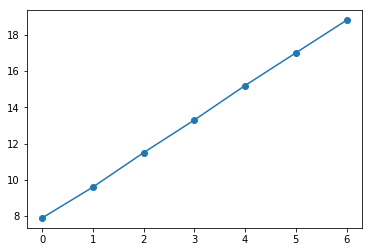

In [3]:
np.polyfit(years, sales, 1)  #Fitting a curve,  tell it the x values, y values, and degree of the curve you want. Here we did linear thus the 1. 
plt.plot(years, sales, '-o', label='fit')

In [4]:
#Defining the best fit line finding slope and y intercept and then seeing what those values are
def best_fit_slope_and_intercept(years, sales):
    m=((mean(years)*mean(sales))-mean(years*sales))/((mean(years)**2)-mean(years*years))
    b=mean(sales)-m*mean(years)
    return m, b 

m, b=best_fit_slope_and_intercept(years, sales)

print(m,b)

1.82857142857 7.84285714286


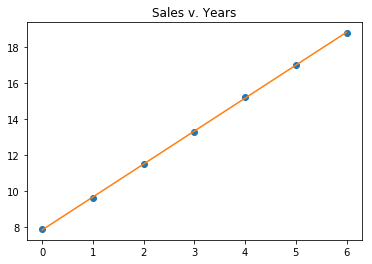

In [5]:
#Ploting the fit line and the years and sales.
fit_line=[(m*x)+b for x in years]
plt.plot(years, sales, 'o')
plt.title("Sales v. Years")
plt.plot(years, fit_line)

So what was that equation? 
$$y=mx+b$$
m=1.82857142857 b=7.84285714286
So our equation was
$$y=1.82857142857x +7.84285714286$$

Using this equation let's estimate what the sales of the GPS equipment was in 2005 and compare this with the projected sales. 


In [6]:
#computing the sales in 2005 from our best fit line
1.82857142857*5 +7.84285714286

16.985714285710003

Not bad because the sales in 2005 were given as 17. 
Let's make it so our model is defined as a function, so that we could make predictions of sales in the future. 

In [7]:
#defining our best fit line as a function 
def s(t):
    return (1.82857142857*(t) +7.84285714286)

Assuming this model continued, what would sales be at the end of 2018? Let's actually look at what has happend from 2006 until 2018.  


In [8]:
#making a list of values of time to input into the function. 
t=np.arange(7,19,1)

In [9]:
#Seeing what the sales would be from 2006 to 2018
s(t)

array([ 20.64285714,  22.47142857,  24.3       ,  26.12857143,
        27.95714286,  29.78571429,  31.61428571,  33.44285714,
        35.27142857,  37.1       ,  38.92857143,  40.75714286])

Do you think that is what sales are now? Why or why not? We don't actually have this data from this company so let's just think about it.

A **linear function** is usually defined as:

$$f(x) = m  x + b$$

where $m$ is the slope (or rate of change), and b is the $y$-intercept. 

Notice in a linear function the rate of change is constant between points. 

Slope between two points $(x_1,y_1)$ and $(x_2, y_2)$ is given by $$ m=\frac{y_2-y_1}{x_2-x_1}$$

We can also relate a linear function to an arithmetic sequence.  

An arithmetic sequence is one that exhibits a constant change between terms.  How does that relate to a linear function?
Every successive term of the sequence can be determined by multiplication and/or addition by the exact same constant.  When plotted, the terms of an arithmetic sequence fall on a straight line.  

>"*In mathematics, an arithmetic progression (AP) or arithmetic sequence is a sequence of numbers such that the difference between the consecutive terms is constant. For instance, the sequence 5, 7, 9, 11, 13, 15, . . . is an arithmetic progression with common difference of 2.*" -- Wikipedia

In [10]:
#Defining an arithmetic sequence that goes up by one each time.  Takes the value before it and adds 1
arith_1 = [1]
for i in range(5):
    next = arith_1[i] + 1
    arith_1.append(next)
    
arith_1

[1, 2, 3, 4, 5, 6]

In [11]:
#Defining an arithmetic sequence that goes up by 3 each time.  Takes the value before it and adds 3
arith_2 = [2]
for i in range(5):
    next = arith_2[i] +3
    arith_2.append(next)
    
arith_2

[2, 5, 8, 11, 14, 17]

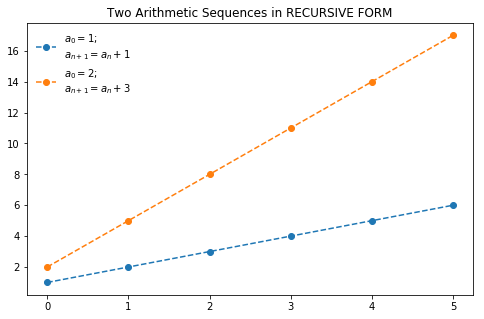

In [12]:
plt.figure(figsize = (8,5))
plt.plot(arith_1, '--o', label = "$a_0 = 1$; \n$a_{n+1} = a_n + 1$")
plt.plot(arith_2, '--o', label = "$a_0 = 2$; \n$a_{n+1} = a_n + 3$")
plt.title("Two Arithmetic Sequences in RECURSIVE FORM")
plt.legend(loc = "best", frameon = False)

Linear functions exhibit the same behavior.  We can recognize linear situations because of a constant rate of change.
The $y$-intercept is analagous to $a_0$ or the starting place in our sequence, so the sequences above can be defined using our knowledge of the starting value and rate of change (how much is added every term).

$$s1(x) = 1x + 1$$

$$s2(x) = 3x + 2$$

We can verify this with a plot.

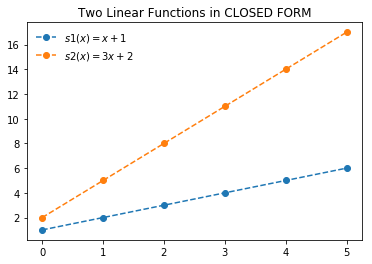

In [13]:
#Plotting the linear functions 
x = np.arange(0, 6, 1)

def s1(x):
    return x + 1

def s2(x):
    return 3*x + 2

plt.figure()
plt.plot(x, s1(x), '--o', label = '$s1(x) = x + 1$')
plt.plot(x, s2(x), '--o', label = '$s2(x) = 3x + 2$')
plt.title("Two Linear Functions in CLOSED FORM")
plt.legend(loc = "best", frameon = False)

Notice how each point related to the one before it and changed from it by a constant rate. 

**Let's consider this example: Cost, Revenue, and Profit:**

A manufracturer has a monthly fixed cost of \$100,000 and a production cost of \$14 per unit produced.  The product then sells for \$20 per unit. 

What is the Cost function?

What is the Revenue function?

What is the Profit functon?

Compute the profit (or loss) from production levels of 12,000 and 20,000.

What is the break even point?







In [14]:
# Some inputs we will use in our functions. np.linspace Returns evenly spaced numbers over a specified interval.
np.linspace(0,40000,40000)

array([  0.00000000e+00,   1.00002500e+00,   2.00005000e+00, ...,
         3.99979999e+04,   3.99990000e+04,   4.00000000e+04])

In [15]:
#Defining the cost function 
def C(x):
    return 14*x+100000

In [16]:
#Defining Revenue Function 
def R(x):
    return 20*x

In [17]:
#Defining the Profit function 
def P(x):
    return R(x)-C(x)

In [18]:
#finding profit at 12000 units. 
P(12000)

-28000

In [19]:
P(20000)

20000

So we would think that it would happen somewhere between 12,000 units and 20,000 units since the profit goes from negative to positive.  So where was that break even point?

In [20]:
#define x as a symbol now so it can symbolically solve the equation where cost is equal to revenue. 
x = sy.Symbol('x')
eq = sy.Eq(C(x), R(x)) #makes the equation we want to solve.  
sy.solve(eq) #sovles the equation 

[50000/3]

Let's check: This would be where Cost=Revenue or Profit=0.  

In [21]:
P(50000/3)

0.0

## Stocks 

Let's follow the link to watch an interesting video. https://www.youtube.com/watch?v=GSsefODDN_s

Let's use what we did in lab 1 about importing stock data to try to do an example that involves using lines to predict whether we should buy or not. 





In [22]:
#libraries, such as pandas, that we need to import to work with the stock data 
import datetime as dt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
%matplotlib inline
import matplotlib.pyplot as plt



In [23]:
style.use('ggplot') #just a style of plot there are others

start = dt.datetime(2019, 1, 1)  #tells where to start looking at the data, year, month, day
end = dt.datetime.now() #stops looking now 
df = web.DataReader('TSLA', 'yahoo', start, end)

print(df.head())


                  High         Low        Open       Close    Volume  \
Date                                                                   
2019-01-02  315.130005  298.799988  306.100006  310.119995  11658600   
2019-01-03  309.399994  297.380005  307.000000  300.359985   6965200   
2019-01-04  318.000000  302.730011  306.000000  317.690002   7394100   
2019-01-07  336.739990  317.750000  321.720001  334.959991   7551200   
2019-01-08  344.010010  327.019989  341.959991  335.350006   7008500   

             Adj Close  
Date                    
2019-01-02  310.119995  
2019-01-03  300.359985  
2019-01-04  317.690002  
2019-01-07  334.959991  
2019-01-08  335.350006  


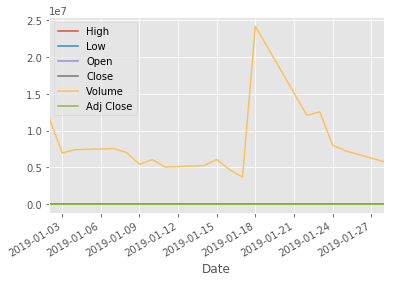

In [24]:
df.plot()
plt.show()

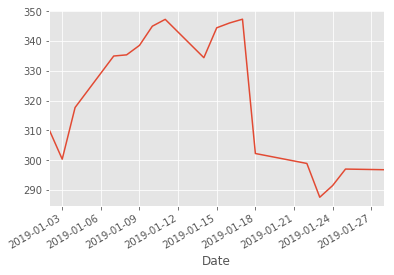

In [25]:
df['Adj Close'].plot()
plt.show()

Now let's think back to the video we watched about slope using that to inform buying decisions. 
For now we are going to do a simplified version of this.  Later, perhaps when we know more about the derivative, we will tackle it a little more sophisticatedly.  

Let's find the slope of the line between the highs and the slope of the line between the lows.  


In [26]:
df[['Adj Close']]

,Adj Close
Date,
2019-01-02,310.119995
2019-01-03,300.359985
2019-01-04,317.690002
2019-01-07,334.959991
2019-01-08,335.350006
2019-01-09,338.529999
2019-01-10,344.970001
2019-01-11,347.260010
2019-01-14,334.399994



## Quadratic Functions

Let's begin with an example: ThermoMaster manufactures an indoor-outdoor thermometer at its overseas subsidiary.  Management has estimates that the profit (in dollars) realizable by ThermoMaster in the maufacture and sale of $x$ thermometers per week is $$P(x)=-0.001x^2+8x-5000$$

Find ThermomMaster's weekly profit if its level of production is (a) 1000 thermometers per week and (b) 2000 thermometers per week. Also plot this profit function. 



In [27]:
#define the function
def P(x):
    return (-0.001*x**2+8*x-5000)

x=np.linspace(0,3000,3000)



In [28]:
#Evaluate the profit function we just defined at 1000
P(1000)

2000.0

In [29]:
P(2000)

7000.0

Text(0,0.5,'Profit in dollars')

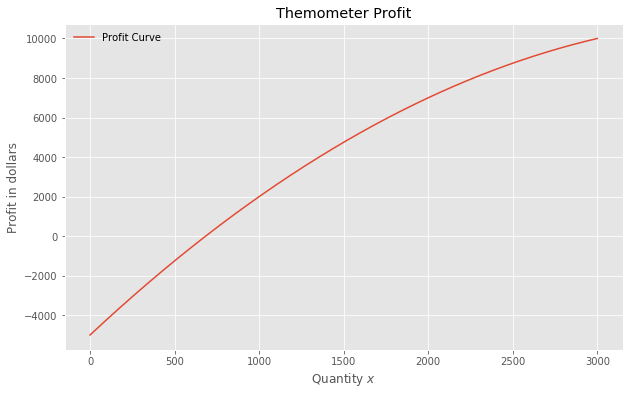

In [30]:
#plot the profit function
plt.figure(figsize = (10,6))
plt.plot(x, P(x), label = "Profit Curve")
plt.title("Themometer Profit")
plt.legend(frameon = False)
plt.xlabel("Quantity $x$")
plt.ylabel("Profit in dollars")

Text(0,0.5,'Profit in dollars')

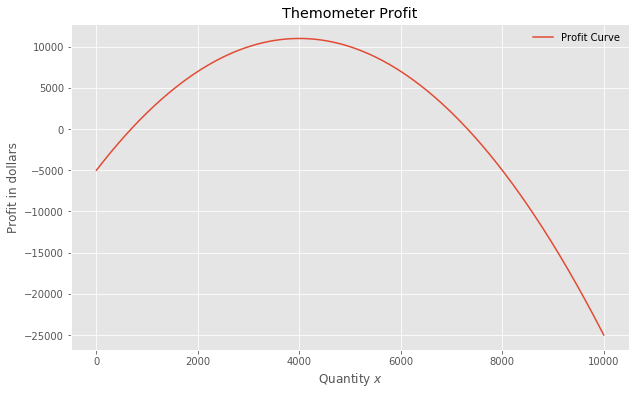

In [31]:
#plot the profit function with more quantity
x=np.linspace(0,10000,2500)

plt.figure(figsize = (10,6))
plt.plot(x, P(x), label = "Profit Curve")
plt.title("Themometer Profit")
plt.legend(frameon = False)
plt.xlabel("Quantity $x$")
plt.ylabel("Profit in dollars")


Looking at this function and seeing that it was quadratic we probably had an idea that it was of this shape.  What do you notice about the profits, should we be selling 10,000 units according to this model?  

Later we will learn to optimize this and see based on this model of our profits how many units should we be selling to maximize our profits.  

Let's take a look at that quadratic. 

Quadratic functions are in the form $$y=ax^2+bx+c$$ where a, b, and c are real numbers.




Supply and demand equations are also examples of given quadratic functions. 
You can take a look in your e-book (https://www.webassign.net/ebooks/tanapcalc10/shell.html?s=4f1693b5a1e0740d35a20e1c0912c5ec&c=537385&f=6232015&type=youbook&id=605). 



A **demand equation** expresses the relationship between unit price and the quantity demanded, and the graph is called the **demand curve**. A demand function is defined by $p=f(x)$ where $p$ measures the unit price and $x$ measure the number of units of the commodity of interest.  This is generally a decreasing function since in general the quantity demanded of a commodity decreases as the commodity's unit price increases, and vice versa. 

A **supply equation** is the relationship between the unit price and the quantity supplied and the graph is the **supply curve**. In general an increase in the unit price induces the producer to increase the supply of the commodity and thus generally an increasing function. The **supply function** is defined by $p=f(x)$ where $p$ is unit price and $x$ is the number of units.  

With just pure competition the price of a good will settle at a level dictated by the following: The supply of the commodity will be equal to the demand for it.  If price is too high the consure will not buy, but if the price is too low the producer will not supply it. Market equilibrium is when the quantity produced is equal to the quantity demanded.  The quantity that makes this happen is the **equlibrium quantity** and the price where this happens is the **equilibrium price**.  How can we figure out where that happens? Consider this example: 

Supply and Demand for bluetooth headsets. 
The demand function is given by 

$$p=d(q)=-0.025q^2-0.5q+60$$


The supply function is given by 
$$p=s(q)=0.02q^2+0.6q+20$$

Let's graph and find the equilibrium price and quantity. 



In [32]:
def d(q):
    return (-0.025*q**2-0.5*q+60)

def s(q):
    return (0.02*q**2+0.6*q+20)

q=np.linspace(0,40,1000)

            

Text(0,0.5,'Price')

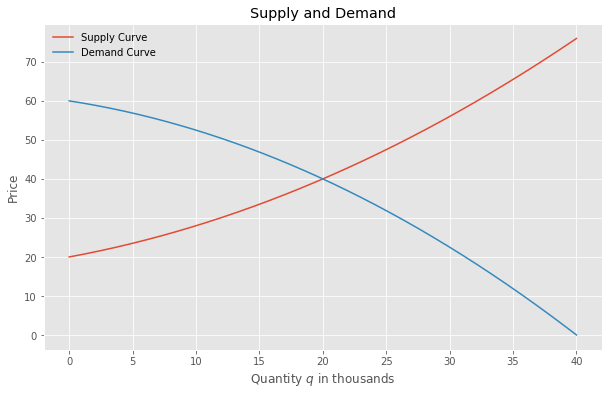

In [33]:
plt.figure(figsize = (10,6))
plt.plot(q, s(q), label = "Supply Curve")
plt.plot(q, d(q), label = "Demand Curve")
plt.title("Supply and Demand")
plt.legend(frameon = False)
plt.xlabel("Quantity $q$ in thousands")
plt.ylabel("Price")

In order to find this value where the curves intersect, we need to solve the equation:

$$s(q) = d(q)$$

We can use Sympy to accomplish this with the `Eq` and `Solve` commands. 

In [34]:
q = sy.Symbol('q')
eq = sy.Eq(s(q), d(q))
sy.solve(eq)

[-44.4444444444444, 20.0000000000000]

Does the -44.44 make sense? No. Why?


So what is the equilibrium quantity?  And then how do we use that to find the price? 


In [35]:
s(20)

40.0

For readability, let's update the plot to include this point and add  text and an arrow pointing to the equilibrium point using the matplotlib's `annotate` function.  This function draws an arrow with some text to a point on the graph.

Text(20,50,'Equilibrium at (20, 40)')

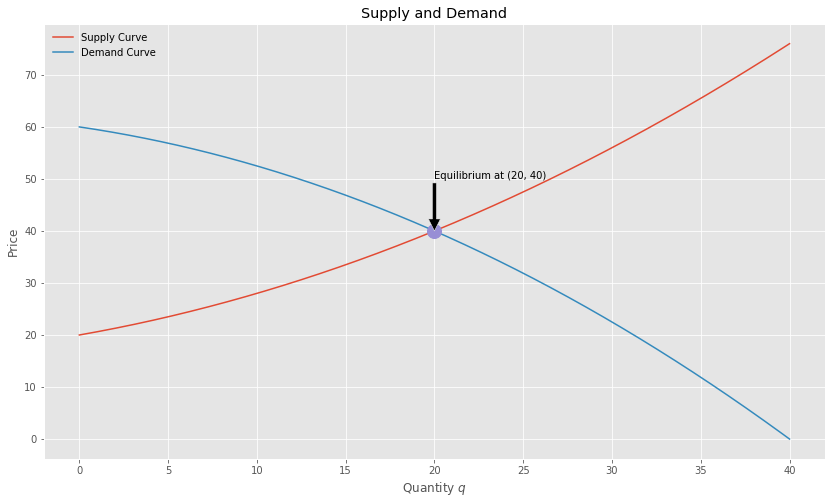

In [36]:

fig = plt.figure(figsize= (14, 8)) #create figure and reset q to be numbers
q = np.linspace(0, 40, 1000)

ax = fig.add_subplot(111)

plt.plot(q, s(q), label = "Supply Curve") #plot supply, demand, and equilibrium points
plt.plot(q, d(q), label = "Demand Curve")
plt.plot(20, 40, 'o', markersize = 14)


plt.title("Supply and Demand")#add titles and legend
plt.legend(frameon = False)
plt.xlabel("Quantity $q$")
plt.ylabel("Price")


#ax = plt.axes()#add arrow with annotation
ax.annotate('Equilibrium at (20, 40)', xy=(20,40), xytext=(20, 50), arrowprops=dict(facecolor='black'))

That's nice if you are given the function but let's look at an example of using some data to create the supply and demand functions. 
 
We will consider a small example to start with. We could use similar techniques to handle larger data sets. 

**Example: Restaurants need chicken and Farms need to sell chicken**

The weekly demand for chicken at several local farm to table restaurants is given in the following table: 

|Price per kilogram| Farm Eats|Table Farm|Local Eatz|Yumz|The Chicken|Total market demand|
|---------------   |----|---|----|----|----|--|----|
|15                | 30  | 40 | 10  | 15  | 30  | 125| 
|---------------   |----|---|----|----|----|--|
|30                | 20 | 29 | 8  | 10  | 25  | 90|
|---------------   |----|---|----|----|----|--|
|45                | 10 | 20 | 7  | 7  | 20  | 64|
|---------------   |----|---|----|----|----|--|
|60                | 5 | 10 | 5  | 3  | 15  | 38| 
|---------------   |----|---|----|----|----|--|
|75                | 0  | 8 | 1  | 1  | 8  | 18| 
|---------------   |----|---|----|----|----|--|
|90                | 0  | 5 | 0 | 0  | 2  | 7|
The weekly supply for two local chicken farms is given in the table below:

|Price per kilogram|Lavender Chickens|Banny Rosters|Total Market Supply|
|---------------   |----|---|----|
|15                | 0  | 10 | 10  | 
|---------------   |----|---|----|
|30                | 15 | 20 | 35 | 
|---------------   |----|---|----|
|45                | 30 | 34 | 64  | 
|---------------   |----|---|----|
|60                | 45 | 50 | 95  | 
|---------------   |----|---|----|
|75                | 58  | 70 | 128  | 
|---------------   |----|---|----|
|90                | 70  | 90 | 160 | 


In [37]:
x=[15, 30, 45, 60, 75, 90]

In [38]:
s=[10, 35, 64, 95, 128, 160]

In [39]:
d= [125, 90, 64, 38, 18, 7]

Text(0,0.5,'Price')

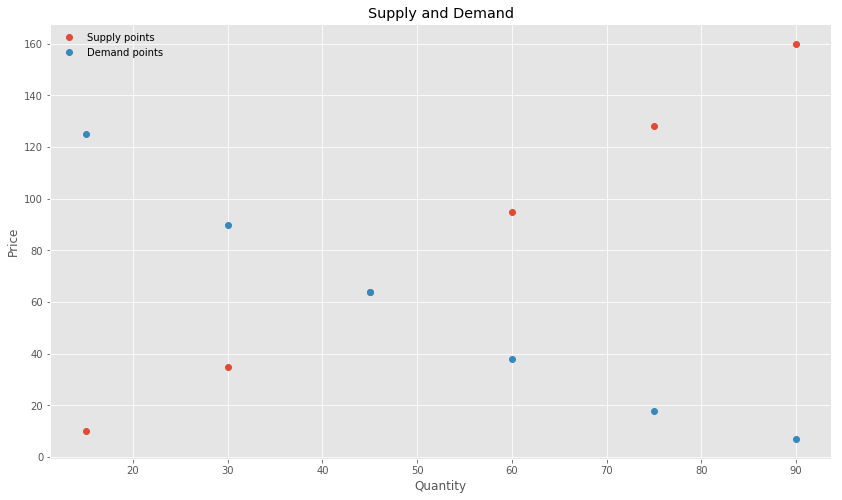

In [40]:
fig = plt.figure(figsize= (14, 8)) #create figure and reset q to be numbers
q = np.linspace(0, 40, 1000)

ax = fig.add_subplot(111)

plt.plot(x, s, 'o', label = "Supply points") #plot supply, demand
plt.plot(x, d, 'o', label = "Demand points")



plt.title("Supply and Demand")#add titles and legend
plt.legend(frameon = False)
plt.xlabel("Quantity")
plt.ylabel("Price")

This next cell will get the coefficients of the demand curve and the next uses them to write in the form $ax^2+bx+c$

In [41]:
a, b, c=np.polyfit(x,d,2)
print(a, b, c)

0.0114285714286 -2.78476190476 164.2


In [42]:
#using the coefficients found above defining the demand curve as a function
def P(x):
    return (0.0114285714286*(x**2)-2.78476190476*x+164.2)

This following cell is the coefficents for the supply curve and then writes it in the form of a quadratic function 

In [43]:
e, f, g=np.polyfit(x,s,2)
print(e ,f, g)

0.00404761904762 1.59404761905 -15.5


In [44]:
def Z(x):
    return (0.00404761904762*(x**2)+1.59404761905*x+-15.5)

[15 30 45 60 75 90]


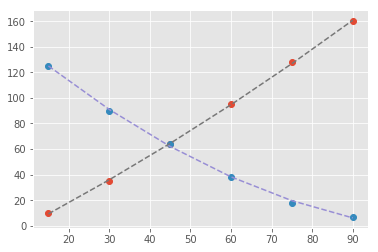

In [45]:

x=np.arange(15,105,15) #had to redefine x so that it could be used in the functions for supply and demand.  Here it is the list from 15 to 90 counting by 15s. 
print(x)
plt.plot(x, s, 'o', label = "Supply points") #plot supply, demand as the data points
plt.plot(x, d, 'o', label = "Demand points")
plt.plot(x, P(x), '--', label="Demand Curve") #plot the fitted supply and demand curves
plt.plot(x, Z(x), '--', label="Supply Curve")

In [46]:
x = sy.Symbol('q')
eq = sy.Eq(P(x), Z(x))
sy.solve(eq)

[44.3547149654631, 548.903349548511]

Note: Supply and demand functions aren't always quadratic.  We we see some other examples in our notes. 

## Exponential Functions 


We will model many things with exponential functions. 


Exponential functions are in the form $$ f(x)=b^x$$ where $b$ is a constant. Let's see what that looks like on a graph. 





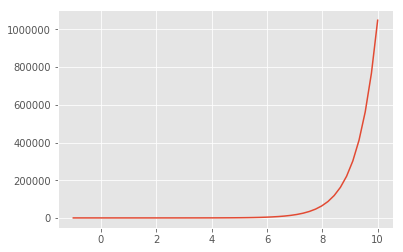

In [47]:
x=np.linspace(-1,10,50)

def f(x):
    return 4**(x)

plt.plot(x, f(x))



In [48]:
f(0)

1

We will begin with an example you are probably familiar with. Compound interest. 

You are probably familiar with $$A=Pe^{rt}$$
Where $A$ is the amount accumulated at the end of $t$ years, $P$ is your principal, $r$ is your rate as a decimal, and $t$ is your time in years. We use this when our investment is compounding continuously. 

Another compound interest formula for different compounding periods per year. 

$$A=P(1+\frac{r}{m})^{mt}$$ 
where $A$ is the ampund accumulated after $t$ years, $P$ is the principal (initial amount invested), $r$ is the nominal interest rate per year, $m$ is the number of conversion periods per year (or compounding periods per year), and $t$ is the time in years. 



Let's calculate the accumulated amount after 5 years on an initial investment of \$1000, with an interest rate of 4\% when interest is compounded annually, semiannually, quarterly, monthly, and daily. 

In [49]:
#here I defined A as a function of m, compounding periods per year, since that was the variable I was changing. 
def A(m):
    return 1000*(1+.04/m)**(m*5)

In [50]:
A(1)

1216.6529024000001

In [51]:
A(2)

1218.9944199947574

In [52]:
A(4)

1220.190039947967

In [53]:
A(12)

1220.9965939421215

In [54]:
A(365)

1221.3893739754637

What if now we were compounding continuously:  $A=Pe^{rt}$

In [55]:

1000*np.exp(.04*5)

#note np.exp is what we have to use for e.  We can put whatever it is raised to in the parenthesis. 

1221.4027581601699

Another example of use of an exponential function: 
  
 Cows are a important source of biological contamination of fresh water by enteric (intestinal) pathogens, such as anthrax, salmonella, tetanus, giardia and E. coli O157:H7, present in the cow's manure. It is expensive and time consuming to test for each of the approximately 100 waterborne enteric pathogens, so an indicator specie, fecal coliform, is tested instead. Cows produce about 1011 (100 billion) colony forming units of fecal coliform per cow per day, an order of magnitude greater than sheep and hogs.

  The Granger Drain is a system of above-ground drainage ditches and subsurface tile drains and pipes, covering about 18000 acres, that eventually discharges into the Yakima River in east-central Washington State. This semi-arid region receives about 8 inches of rainfall per year, and is supplemented with about 36 inches of irrigation water per year, mostly delivered by the traditional method of water running across the ground in furrows (rills). In addition to orchards and various crops, this area also hosts a number of dairies and animal feed operations (feedlots). The Yakima Valley is one of the most productive agricultural areas on Planet Earth.

  Waterborne pathogens are quickly washed into the Granger Drain system, and hence into the Yakima River, during the irrigation season. In order to quantify the relationship between cows and contaminated runoff, the South Yakima Conservation District measured fecal coliform concentrations in water from drains at the outlets of 8 different sub-basins within the Granger Drain system from 1990 to 1992. Repeated measurements of fecal coliform are given as mean values in the table. The Washington State Department of Ecology reviewed the data and compared the FC counts with a number of other variables. The acreage covered by dairies and feedlots was the only parameter, out of several studied, which correlated well with the fecal coliform data.

  As is apparent from the graph and the data that there is a strong positive correlation between the acreage of cows and the amount of FC in the water. DOE presented a linear regression between acreage and FC in their report, however an exponential model fits the data with a higher correlation coefficient. The data and model raise some interesting questions. Why is there 3000 cfu/100 ml of FC in the drainage water when there are no cows? Why is there a positive correlation between acreage of dairies/feedlots and FC, but little to no correlation between the number of dairy cows and FC? What percentage decrease in cow acreage must there be to decrease the FC counts by 90%, which is DOE's goal? What would be the effect on FC counts of recycling the drainage water back as irrigation water ("gray water"), to conserve water in this arid region?

Reference: Washington Department of Ecology, "Granger Drain Fecal Coliform Bacteria Total Maximum Daily Load Assessment and Evaluation"; WA DOE Report, 2001, draft.

Our data is in a csv file so we need to import some libraries to read that. 

In [56]:
import csv 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import expon

In [57]:
df= pd.read_csv("cowrunoff.csv")  #defining our data frame to be the cowrunoff csv file 

In [58]:
df #printing or showing our data 

,Sub Basin Numer,Acreage,CFU
0,1&2,89.00,6161
1,3,106.00,7477
2,4,52.00,4336
3,5,38.00,3612
4,6,0.01,3065
5,7,91.00,5446
6,8,50.00,3800


This data is of: Fecal coliform in the Granger Drain, WA		
sub-basins within the larger Granger drain system		
acreage of dairies and feedlots within the sub-basin		
fecal coliform counts in colonies per 100 milliliters	
Retrieved from:http://resources.seattlecentral.edu/qelp/sets/045/045.html

In [59]:
dataframe=pd.read_csv('cowrunoff.csv')
print(dataframe)

  Sub Basin Numer  Acreage   CFU
0             1&2    89.00  6161
1               3   106.00  7477
2               4    52.00  4336
3               5    38.00  3612
4               6     0.01  3065
5               7    91.00  5446
6               8    50.00  3800


In [60]:
sorted_cows=dataframe.sort_values(by='Acreage', ascending=True)  #sorting it to plot it so that then we can fit a curve to it. 
print(sorted_cows)

  Sub Basin Numer  Acreage   CFU
4               6     0.01  3065
3               5    38.00  3612
6               8    50.00  3800
2               4    52.00  4336
0             1&2    89.00  6161
5               7    91.00  5446
1               3   106.00  7477


In [61]:
x=sorted_cows.Acreage
y=sorted_cows.CFU

Text(0,0.5,'CFU ((cfu/100ml))')

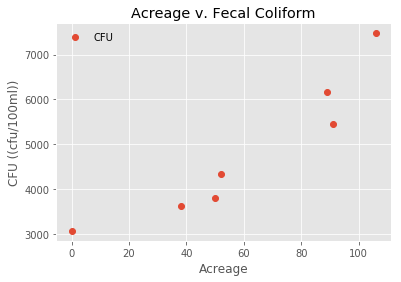

In [62]:
plt.plot(x,y, 'o')
plt.title("Acreage v. Fecal Coliform")#add titles and legend
plt.legend(frameon = False)
plt.xlabel("Acreage")
plt.ylabel("CFU ((cfu/100ml))")


In [63]:
def func(x,a,b,c):
    return a*np.exp(-b*x)+c

In [64]:
popt, pcov=curve_fit(func, x, y)
popt 


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


array([  3.53432784e+02,  -2.42331271e-02,   2.76420485e+03])

Text(0,0.5,'CFU ((cfu/100ml))')

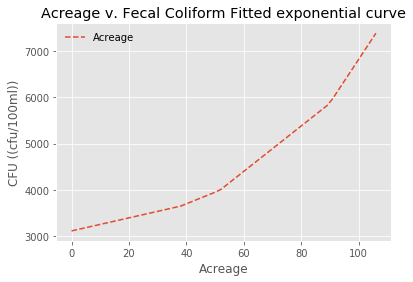

In [65]:
plt.plot(x,func(x, *popt),'--')

plt.title("Acreage v. Fecal Coliform Fitted exponential curve")#add titles and legend
plt.legend(frameon = False)
plt.xlabel("Acreage")
plt.ylabel("CFU ((cfu/100ml))")


In [66]:
def C(x):
    return 353.432784*np.exp(.0242331271*x)+276.420485

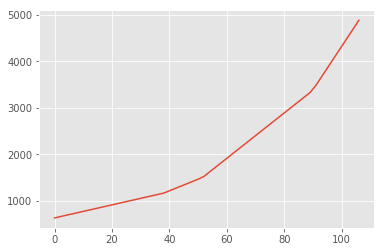

In [67]:
plt.plot(x,C(x))

Using this model what would the projected fecal coliform be for 150 and 200 acres?

In [68]:
C(150)

13671.763481850245

In [69]:
C(200)

45271.964546109957

** Drug Absorption Example** The concentration of a certain drug in an organ at any time $t$ (where $t$ is in seconds is given by $$d(t)=0.08+0.12(1-e^{-0.02t})$$
where $d(t)$ is meausred in grams per cubic centimeter (g/m^3). 

    - Find the inital concentration of the drug in the organ
    - What is the concentration of the drug after 20 seconds?
    - Plot the concentration of the drug in the organ
    - What will the concentration of the drug be in the long run?



In [70]:
def d(t):
    return 0.08+0.12*(1-np.exp(-0.02*t))


In [71]:
d(0)


0.080000000000000002

In [72]:
d(20)

0.11956159447572329

In [73]:

t=np.arange(0,1000,1)


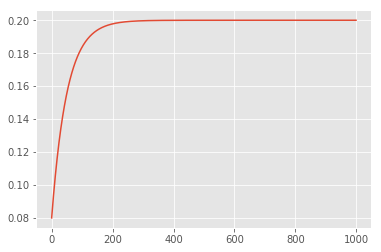

In [74]:
plt.plot(t,d(t))
plt.show()

# For You To Do: 
Also I have now put these questions each in their own cell, so you can add your responses in cells directly below the question. Feel free to add more cells under each, I just put a few in to get you started. 

# 1. Cost, Revenue, and Profit
A manufacturer has a cost of \$8 per unit produced and a monthly fixed cost of \$40,000.  The product sells for \$12 per unit. 

Write the cost, revenue, and profit functions. 

Compute the profit (or loss) at production levels of 8000 and 12000

Find the break even point. 


Plot the Cost and Revenue function. 


# 2. Equation of a Line 

    2a. Find the equation of a line passing through points (2,4) and (3,7).  Then plot this line.
    
    2b. Find the equation of a line that passes through the point (-2,2) and is perpendicular to the line 
                3x+4y-22=0



# 3. Stocks
One of the recommeded stocks to buy for 2019 is Alibaba (BABA).  It is best-known for running China’s most popular online marketplaces- kind of like the Chinese version of Amazon. However, like America’s Amazon.com, it has expanded into additional busineses, such as electronic payments, cloud computing, and media.

(Reminder... I am not giving stock advise I am simply getting you to do some math. Ask someone that knows more about the stock market if you want to try to make some money.  I am simply realy good a spending money on somewhat useless things :)   )

Use the example from above to determine the slope of the support line and the resistance lines and decide if you think it is a good buy based on the info we have from 2019.  (Side note:  I've already called in the data and the plt for you you are just looking looking at slope between highs and slope between lows).  



                  High         Low        Open       Close    Volume  \
Date                                                                   
2019-01-02  137.748993  133.029999  134.130005  136.699997  16708400   
2019-01-03  134.869995  129.830002  134.270004  130.600006  19531300   
2019-01-04  141.080002  133.660004  134.259995  139.750000  22845400   
2019-01-07  144.080002  139.009995  140.550003  143.100006  17239000   
2019-01-08  147.550003  142.059998  145.000000  146.789993  16487600   

             Adj Close  
Date                    
2019-01-02  136.699997  
2019-01-03  130.600006  
2019-01-04  139.750000  
2019-01-07  143.100006  
2019-01-08  146.789993  


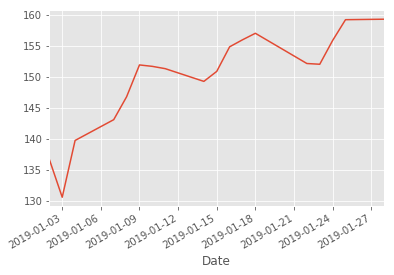

In [75]:
style.use('ggplot') #just a style of plot there are others

start = dt.datetime(2019, 1, 1)  #tells where to start looking at the data, year, month, day
end = dt.datetime.now() #stops looking now 
df = web.DataReader('BABA', 'yahoo', start, end)

print(df.head())
df['Adj Close'].plot()
plt.show()


# 4. Supply and Demand

The supply and demand equations are as follows (note: you need to determine which is supply and which is demand).  

$p=60-2x^2$ and $p=x^2+9x+30$

where $x$ represents the quantity demanded in units of a thousand and $p$ is the unit price in dollars.  

Find the equilibrium quantity and price.  Plot these on the same set of axes, with axes labeled, curves labeled, and the equiliprium point labeled. 



# 5. Exponential Functions 
To solve exponential equations by hand we will need to use logarithms. We will learn a bit more about those soon.  For now let's revist the drug absorption problem.  Instead of wanting to know what the absorption will be at some time $t$, let's find out when the drug absorption reaches a certain level. 

In this next cell, I help you determine when the concentration would reach $0.10g/cm^3$.  Use this to then find when the drug concentration would reach 0.16 g/cm^3 and 0.18 g/cm^3.  

Then using your guess for what the concentration is in the long run (from the exponential models section problem about this problem previously) try to determine if it ever really reaches that number you thought. Then determine when does it get within 0.01 g/cm^3 of that number.  


In [76]:
#
t = sy.Symbol('t')
eq=sy.Eq(0.08+0.12*(1-sy.exp(-0.02*t)),0.10)
sy.solve(eq)



[9.11607783969773]

# 6. Mathematical Models

The estimated number of internet usesr in China (in millions) from 2005 to 2010 is given in the following table. Let 

|Year| 2005|2006|2007|2008|2009|2010|
|---------------|----|---|----|----|----|--|
|Number of users in millions    | 116.1  | 141.9 | 169.0  | 209.0  | 258.1  | 314.8|


First plot the years versus number of internet users.  Based on the shape on this data decide on a type of function (that we worked on today, linear, quadratic, or exponential) to fit to the data to determine a model. 

After determining this, use your model to predict the number (in millions) of internet users in China today. 

After doing this see if your model prediction is close to the actual number today.  


# Think about what you learned today and write about it!
Write a short paragraph about what you learned in this notebook

## Reminder of converting to a pdf

This one should work because I have eliminated any issues with pictures, which was causing the error on the last one. 

Open Terminal (on a mac - you could search Terminal) or open Command Prompt Window (on a windows computer - Click the "Start >> Program Files >> Accessories >> Command Prompt"  or "Start" and then in the search bar type cmd) 

Once you are here type *cd* then drag the folder in which you have your jupyter notebook stored to this line.  This should input the commands to get you into the correct directory. Then press enter. Now you should be ready to enter the command that will help you convert the file to a pdf. 

Type: ** jupyter nbconvert --to pdf nameofyourfile.ipynb" ** Then press enter.  This should convert it to a pdf for you.  The formatting might be a little off and if your pictures are not in the same folder they won't import - if my pictures don't come through on your notebook pdf right now I am not concerned. We will get better with this as we go. 

**Note: where I have name of your file written you actually need to write the name of your file.  Also make sure the name has no space.**
### Please name your file following this set up:  lastname_firstname_lab_two.ipynb

The pdf you just created should appear in the folder where you have your jupyter notebooks if you did it correctly. 

I have uploaded a video to Blackboard of me doing it on my mac to help you try.  **Please come and see me if you are having trouble.** It is incredibly easy to mess up! 